## Imports

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Dataset

In [4]:
ds = tfds.load("colorectal_histology", download=True)

In [5]:
ds_tr = list(tfds.as_numpy(ds)["train"])

In [6]:
ds_x = np.array([i['image'] for i in ds_tr])/255
ds_y = np.array([i['label'] for i in ds_tr])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(ds_x, ds_y, test_size=0.2, shuffle=True)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, shuffle=True)

## Dataset Normalization

In [8]:
INPUT_LENGTH = x_train.shape[1]*x_train.shape[2]

def one_hot_encoding(y_data):
    y_data = y_data.astype(np.int8)
    y_zeros = np.zeros(shape=(y_data.shape[0], 8))
    y_zeros[np.arange(y_data.shape[0]), y_data] =  1
    return y_zeros

In [9]:
y_train = one_hot_encoding(y_train)
y_test = one_hot_encoding(y_test)
y_val = one_hot_encoding(y_val)

## Model 1(Без сжатия картинок)

In [10]:
inp_layer = tf.keras.layers.Input(shape=(150,150,3))
conv1 = tf.keras.layers.Conv2D(2**6, kernel_size=(3,3), padding="valid", activation="relu")(inp_layer)
max_p1 = tf.keras.layers.MaxPool2D()(conv1)
conv2 = tf.keras.layers.Conv2D(2**7, kernel_size=(3,3), padding="valid", activation="relu")(max_p1)
max_p2 = tf.keras.layers.MaxPool2D()(conv2)
conv3 = tf.keras.layers.Conv2D(2**8, kernel_size=(3,3), padding="valid", activation="relu")(max_p2)
max_p3 = tf.keras.layers.MaxPool2D()(conv3)
conv4 = tf.keras.layers.Conv2D(2**9, kernel_size=(3,3), padding="valid", activation="relu")(max_p3)
max_p4 = tf.keras.layers.MaxPool2D()(conv4)
fl = tf.keras.layers.Flatten()(max_p4)
out_layer = tf.keras.layers.Dense(8, activation="softmax")(fl)
model = tf.keras.Model(inputs=inp_layer, outputs=out_layer)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 256)       295168

In [12]:
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=20)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss="CategoricalCrossentropy", metrics=["accuracy"])

In [13]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=16, epochs=100, callbacks=[es])

Epoch 1/100
250/250 [==============================] - 129s 510ms/step - loss: 1.2046 - accuracy: 0.4652 - val_loss: 0.9553 - val_accuracy: 0.5740
Epoch 2/100
250/250 [==============================] - 128s 511ms/step - loss: 0.9097 - accuracy: 0.6040 - val_loss: 0.6890 - val_accuracy: 0.7000
Epoch 3/100
250/250 [==============================] - 127s 509ms/step - loss: 0.8499 - accuracy: 0.6440 - val_loss: 0.7447 - val_accuracy: 0.7500
Epoch 4/100
250/250 [==============================] - 127s 508ms/step - loss: 0.7359 - accuracy: 0.7015 - val_loss: 0.8202 - val_accuracy: 0.6520
Epoch 5/100
250/250 [==============================] - 130s 519ms/step - loss: 0.6186 - accuracy: 0.7600 - val_loss: 0.6372 - val_accuracy: 0.7700
Epoch 6/100
250/250 [==============================] - 129s 516ms/step - loss: 0.5668 - accuracy: 0.7815 - val_loss: 0.5673 - val_accuracy: 0.7800
Epoch 7/100
250/250 [==============================] - 126s 505ms/step - loss: 0.5256 - accuracy: 0.8043 - val_loss: 0

In [14]:
model.evaluate(x_test, y_test)

16/16 [==============================] - 4s 225ms/step - loss: 1.1352 - accuracy: 0.7960


[1.1352331638336182, 0.7960000038146973]

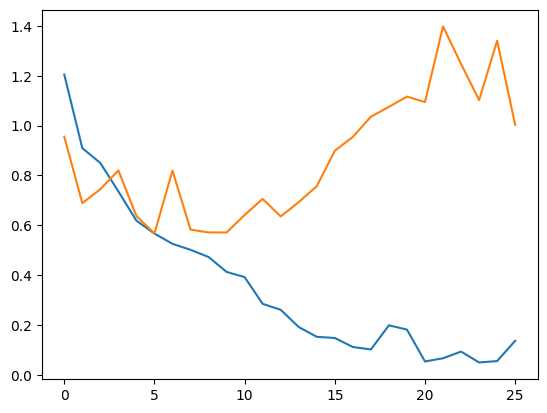

In [15]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

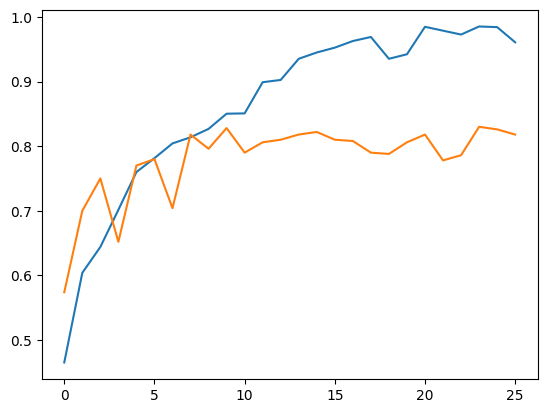

In [16]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])